## Title: NLP for Sentiment Analysis on Tweets on Apple and Google Products
## Student: Reagan Adajo

## Overview
This project aims to build a natural language processing (NLP) model that will rate the sentiments of a Tweet based on its content

## Business and Data Understanding:
### Business Problem
The company wants to develop a model that will assist in judging people's emotions about brands and products using Tweets on Apple and Google products. 
### Business Aim
To build a model that judges customer's emotions on brands and products using their sentiments
### Business Objectives
1. To find out the overall sentiments on Apple and Google products
2. To identify the products with the most positive and negative sentiments
3. To establish how the negative sentiments would be improved 

## Data Understanding

In [13]:
#importing python library to view the data files
import pandas as pd
import numpy as np

#viewing the data file
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='ISO-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


## Data Preparation

In [15]:
#cleaning the dataset 
#removing rows will null values
df = df.dropna()
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: count, dtype: int64

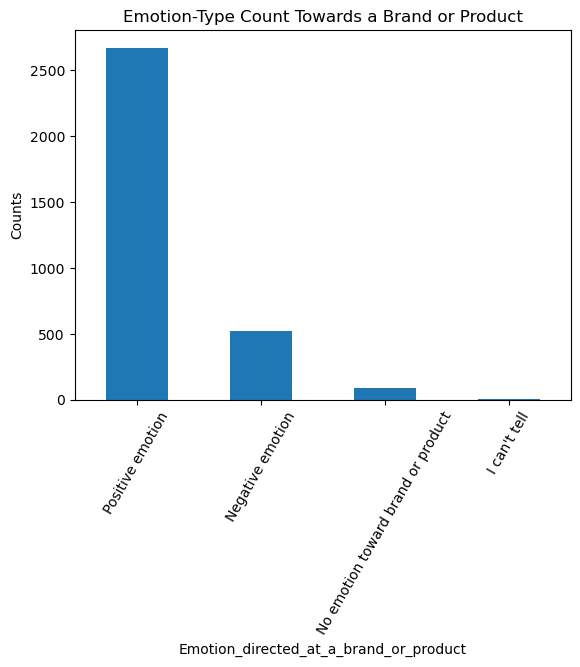

In [16]:
# importing python libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# bar plot for different of emotions
value_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Emotion_directed_at_a_brand_or_product')
plt.ylabel('Counts')
plt.title('Emotion-Type Count Towards a Brand or Product')
plt.xticks(rotation=60)
plt.show()

Tweets on both Google and Apple products were associated with high positive emotions.

In [17]:
# dropping rows to remain with positive and Negative emotions since the other sentiments will not be useful in the analysis
df_cleaned = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]
df_cleaned

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [18]:
#counts directed towards brand or product
df_cleaned['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Android App                         80
Android                             77
Other Apple product or service      34
Name: count, dtype: int64

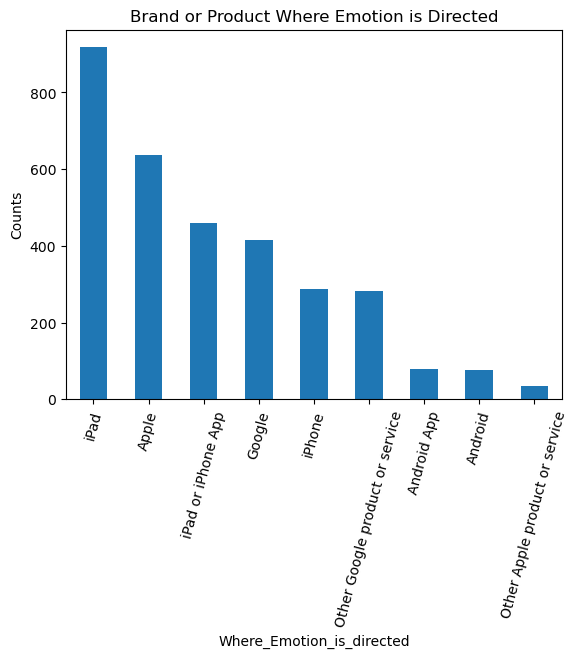

In [19]:
# bar plot on the brand/product emotion is directed
value_counts1 = df_cleaned['emotion_in_tweet_is_directed_at'].value_counts()
value_counts1.plot(kind='bar')
plt.xlabel('Where_Emotion_is_directed')
plt.ylabel('Counts')
plt.title('Brand or Product Where Emotion is Directed')
plt.xticks(rotation=75)
plt.show()

Apple and its related products received the highest emotional reaction on Tweets.

## Modeling

In [20]:
#initilize tokenizer, stemmer, and stopwords objects

# nltk imports
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Creating an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
#standard text preprocessing
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)
    # Remove stopwords using `stopwords_list`
    tokens = [word for word in tokens if word not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    tokens = [stemmer.stem(word) for word in tokens]
    # Return the preprocessed text
    return tokens
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

tweet_data = df_cleaned.tweet_text.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
tweet_data

0       [wesley83, iphon, hr, tweet, rise_austin, dead...
1       [jessede, know, fludapp, awesom, ipad, iphon, ...
2              [swonderlin, wait, ipad, also, sale, sxsw]
3       [sxsw, hope, year, festiv, crashi, year, iphon...
4       [sxtxstate, great, stuff, fri, sxsw, marissa, ...
                              ...                        
9077    [mention, guy, convinc, switch, back, iphon, g...
9079    [quot, papyru, sort, like, ipad, quot, nice, l...
9080    [diller, say, googl, quot, might, run, playsta...
9085    [alway, use, camera, iphon, imag, stabil, mode...
9088                        [ipad, everywher, sxsw, link]
Name: tweet_text, Length: 3191, dtype: object

In [22]:
#view the preprocessed dataset
df_cleaned["preprocessed_text"] = tweet_data
df_cleaned.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4832\3912262949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["preprocessed_text"] = tweet_data


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[wesley83, iphon, hr, tweet, rise_austin, dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[jessede, know, fludapp, awesom, ipad, iphon, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, hope, year, festiv, crashi, year, iphon..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


## Evaluation


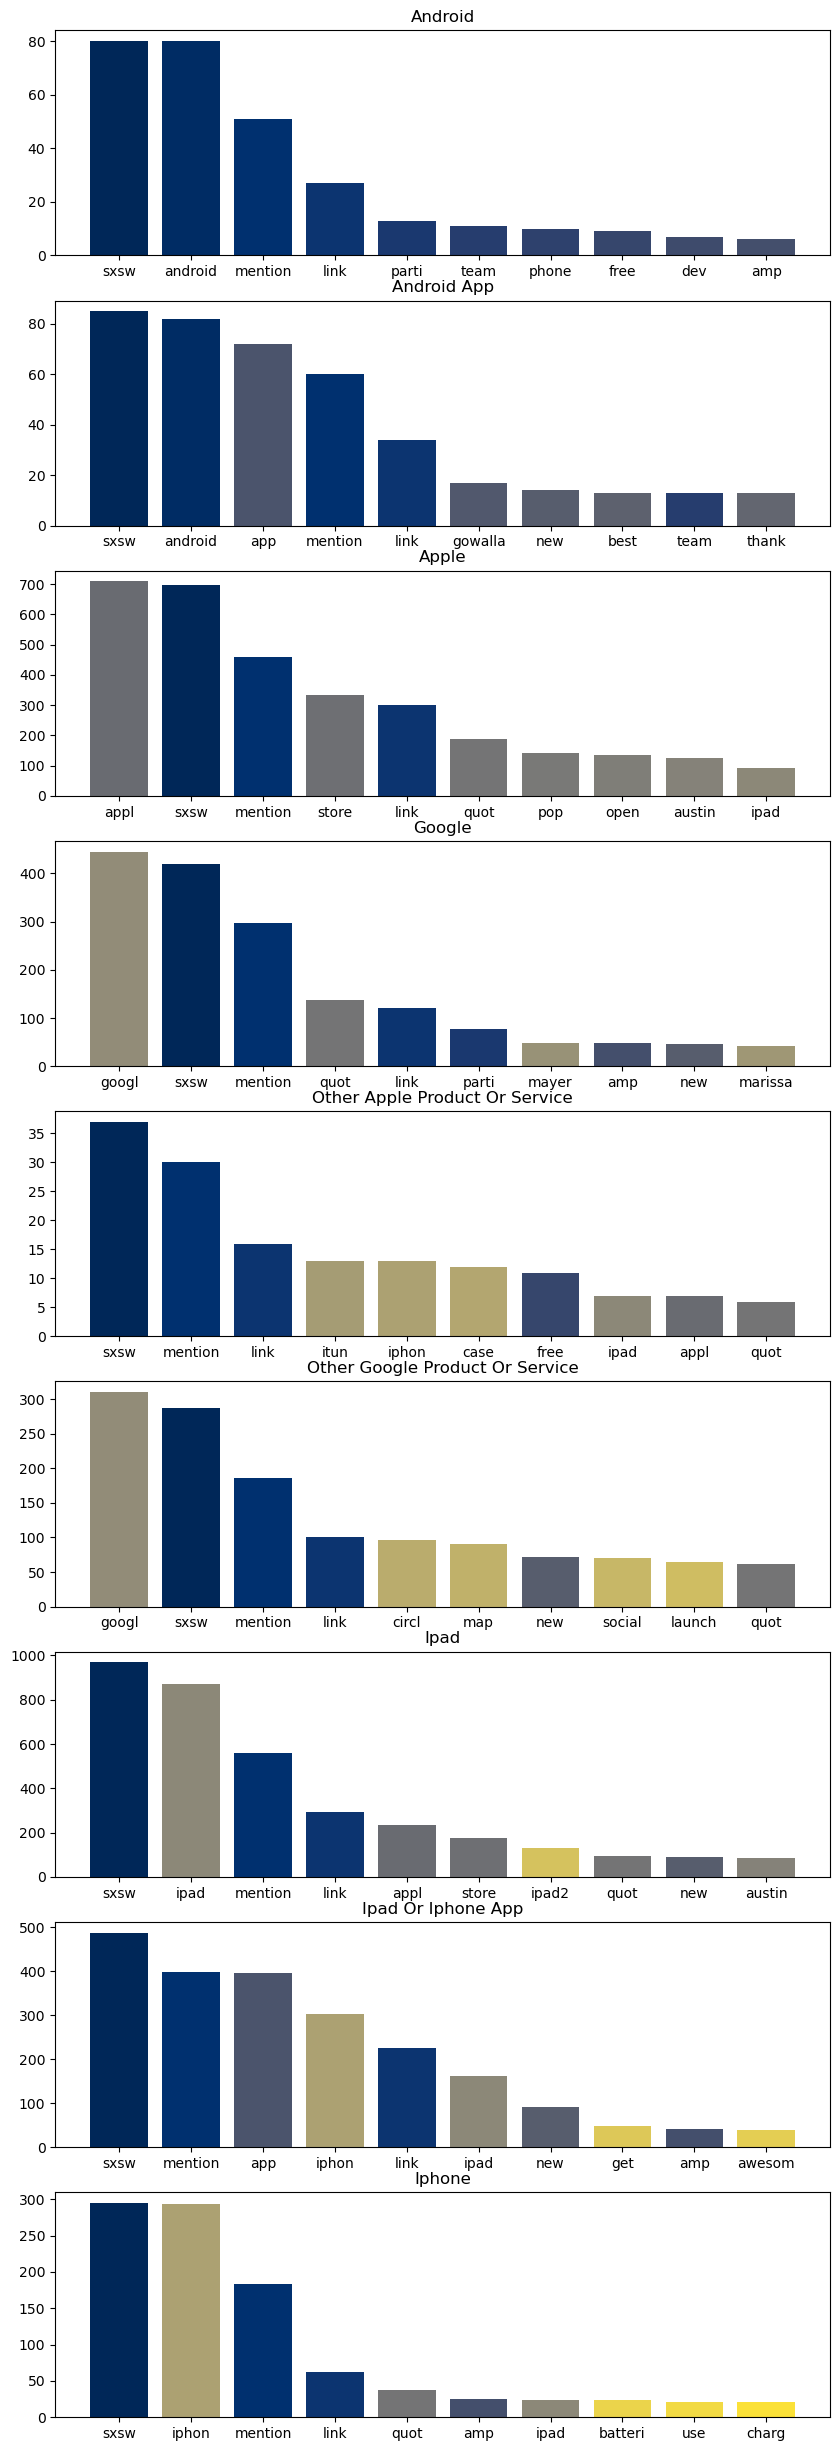

In [ ]:
#visualizing the preprocessed data

# Set up figure and axes

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10, 1*len('emotion_in_tweet_is_directed_at')))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique word
data_by_product = [y for _, y in df_cleaned.groupby('emotion_in_tweet_is_directed_at', as_index=False)]
for idx, tweet_df in enumerate(data_by_product):
    # Find top 10 words in this genre
    all_words_in_tweet = tweet_df.preprocessed_text.explode()
    top_10 = all_words_in_tweet.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(tweet_df.iloc[0].emotion_in_tweet_is_directed_at.title())

In [24]:
#fitting a count vectonizer
# imports
from sklearn.model_selection import train_test_split

# Converting token lists to strings
df_cleaned["joined_preprocessed_text"] = df_cleaned["preprocessed_text"].str.join(" ")

# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned["joined_preprocessed_text"], df_cleaned.emotion_in_tweet_is_directed_at, test_size=0.3, random_state=2151)

X_train

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4832\2750523901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["joined_preprocessed_text"] = df_cleaned["preprocessed_text"].str.join(" ")


1771     sxsw 2011 googl bing smackdown bloodi banal link
3607    sxsw movi star moodi director well fine guy re...
9072    mention iphon case rad readi stop tomorrow get...
5215    mention appl hawk ipad sxsw festiv popup store...
8771    thank heaven nice travel got iphon charger ano...
                              ...                        
6217    mention saw preview new mention ipad app aweso...
740     quot learn thing screen quot year old explan i...
467                         even begin appl win sxsw link
8286    austin convent center today mention fam show n...
8180    mention love sxsw quot appl come cool technolo...
Name: joined_preprocessed_text, Length: 2233, dtype: object

In [25]:
# Import the CountVectorizer object from sklearn

from sklearn.feature_extraction.text import CountVectorizer

# Create a `vectorizer` instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(X_train)

# vectorizing the train and test datasets

X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(y_test)
#fitting the decision tree model into the vectorized data
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize `dt`
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [26]:
# creating a pipepline to fit the vectorized data
#imports
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nlp_pipe =  Pipeline([
    ('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.90)),
    ('nb', MultinomialNB())
])
#defining preprocessing function
def preprocess_text(doc):
    return doc.lower()
#training the pipeline
nlp_pipe.fit(X_train, y_train)

# Variable for prediction
y_pred = nlp_pipe.predict(X_test)

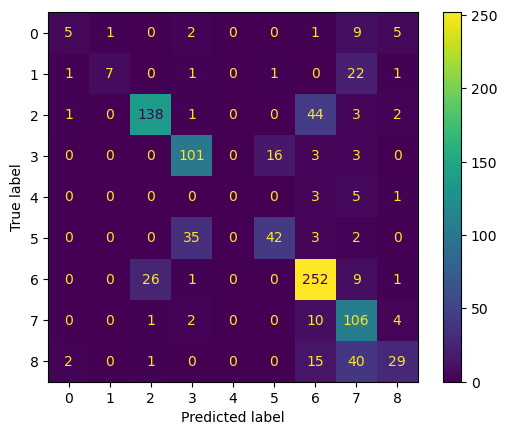

In [27]:
#import for ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score

plot_confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(plot_confusion_matrix).plot();

The model did not perform so well on predicting unseen data with more errors and low accuracy levels

## Recommendation and Insights
### The color orientation in the Confusion Matrix visualizes poor performance of the classification model.
This implies that the actual verses predicted emotions in the tweets will be subject to misclassification. 
### The True and Predicted labels demonstrate a misalignment; 
This implies that there will be a confusion in results interpretation from the model. 
### The imbalance color mapping highlights areas with problems in the model; 
This depiction is useful in dtermining areas that needs to be improved in the model

## Conclusion
### A single tweet from Apple or Google cannot be use in predicting the emotions towards the product or brand.
### Classification model has low accuracy and increased errors in predicting the emotions from a tweet text.
### Tweet_texts are useful in identifying a problem with a product or brand from either Google or Apple, this informs on areas for improvement.